In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, auc, roc_auc_score, roc_curve, f1_score, precision_score, recall_score

%matplotlib inline

### Logistic Regression

In [2]:
sns.set()

In [3]:
# data
x = np.array([0,1,1.5,2,3,4,5,8,11,12,13,14,15]).reshape(-1,1)
y = np.array([1,1,1,1,0,0,1,0,1,0,0,0,0])

In [4]:
model = LogisticRegression(C=10).fit(x, y)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# parameters of the model
a0 = model.coef_
b0 = model.intercept_

In [8]:
print(a0[0], b0)

[-0.2809306] [1.56681843]


In [9]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

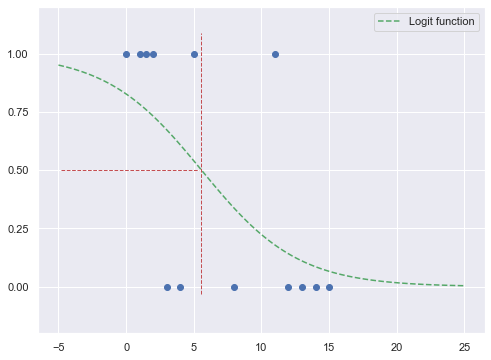

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
x_ = np.linspace(-5, 25, 100)
y_lr1 = sigmoid(a0[0]*x_ + b0[0])
plt.plot(x_, y_lr1, linestyle='dashed', color='g')
plt.axhline(y=0.5, xmin=0.05, xmax=0.36, linewidth=1, linestyle='dashed', color='r')
plt.axvline(x=5.5, ymin=0.12, ymax=0.92, linewidth=1, linestyle='dashed', color='r')
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.legend(['Logit function'])
plt.show()

In [11]:
pred_train = model.predict(x)

In [12]:
pred_train

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [13]:
probabilities = model.predict_proba(x)
probabilities[:,1] # for predicting 1's

array([0.82732958, 0.78345035, 0.75867383, 0.73203211, 0.67349309,
       0.6089965 , 0.54045274, 0.33612151, 0.17895872, 0.14132251,
       0.11053584, 0.08578591, 0.06616547])

In [14]:
accuracy_score(y, pred_train)

0.7692307692307693

In [15]:
precision_score(y, pred_train)

0.7142857142857143

In [18]:
recall_score(y,pred_train)

0.8333333333333334

In [17]:
print(classification_report(y, pred_train))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.71      0.83      0.77         6

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



In [19]:
roc_auc_score(y, pred_train)

0.773809523809524

In [20]:
roc_auc_score(y, probabilities[:,1]) 

0.8809523809523809

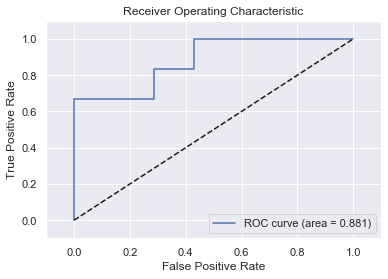

In [21]:
# fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(x)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [24]:
x_3 = transformer.transform(x)

In [25]:
x_3

array([[0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.500e+00, 2.250e+00, 3.375e+00],
       [2.000e+00, 4.000e+00, 8.000e+00],
       [3.000e+00, 9.000e+00, 2.700e+01],
       [4.000e+00, 1.600e+01, 6.400e+01],
       [5.000e+00, 2.500e+01, 1.250e+02],
       [8.000e+00, 6.400e+01, 5.120e+02],
       [1.100e+01, 1.210e+02, 1.331e+03],
       [1.200e+01, 1.440e+02, 1.728e+03],
       [1.300e+01, 1.690e+02, 2.197e+03],
       [1.400e+01, 1.960e+02, 2.744e+03],
       [1.500e+01, 2.250e+02, 3.375e+03]])

In [26]:
model2 = LogisticRegression(C=1000).fit(x_3, y)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
model2.coef_

array([[-4.80253846,  0.75035341, -0.03474647]])

In [28]:
model2.intercept_

array([8.34858493])

In [29]:
b2 = model2.coef_[0][2]
c2 = model2.coef_[0][1]
d2 = model2.coef_[0][0]
e2 = model2.intercept_[0]

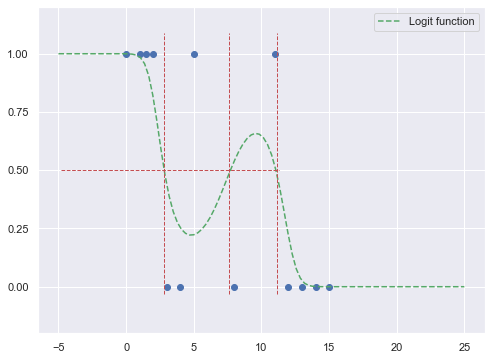

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
y_lr2 = sigmoid(b2*(x_**3) + c2*(x_)**2 + d2*x_ + e2)
plt.plot(x_, y_lr2, linestyle='dashed', color='g')
plt.axhline(y=0.5, xmin=0.05, xmax=0.54, linewidth=1, linestyle='dashed', color='r')
plt.axvline(x=2.8, ymin=0.12, ymax=0.92, linewidth=1, linestyle='dashed', color='r')
plt.axvline(x=7.6, ymin=0.12, ymax=0.92, linewidth=1, linestyle='dashed', color='r')
plt.axvline(x=11.15, ymin=0.12, ymax=0.92, linewidth=1, linestyle='dashed', color='r')
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.legend(['Logit function'])
plt.show()

In [31]:
y_pred = model2.predict(x_3)

In [32]:
y_pred 

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [33]:
accuracy_score(y, y_pred)

0.8461538461538461

In [34]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.83      0.83         6

    accuracy                           0.85        13
   macro avg       0.85      0.85      0.85        13
weighted avg       0.85      0.85      0.85        13



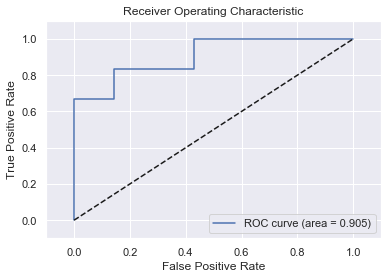

In [35]:
# fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y, model2.predict_proba(x_3)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
model3 = LogisticRegression(C=0.1).fit(x_3, y)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
model3.coef_

array([[ 0.00056198,  0.01717321, -0.00237239]])

In [38]:
model3.intercept_

array([0.10828852])

In [39]:
b2 = model3.coef_[0][2]
c2 = model3.coef_[0][1]
d2 = model3.coef_[0][0]
e2 = model3.intercept_[0]

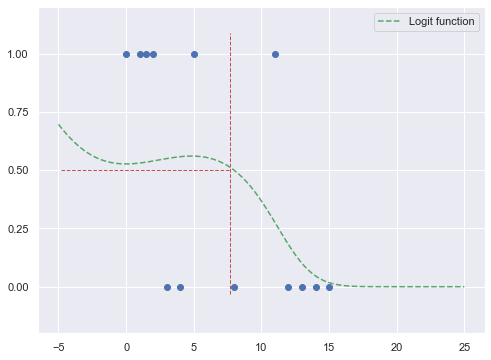

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
y_lr3 = sigmoid(b2*(x_**3) + c2*(x_)**2 + d2*x_ + e2)
plt.plot(x_, y_lr3, linestyle='dashed', color='g')
plt.axhline(y=0.5, xmin=0.05, xmax=0.43, linewidth=1, linestyle='dashed', color='r')
plt.axvline(x=7.7, ymin=0.12, ymax=0.92, linewidth=1, linestyle='dashed', color='r')
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.legend(['Logit function'])
plt.show()

In [41]:
y_pred3 = model3.predict(x_3)

In [42]:
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [43]:
accuracy_score(y, y_pred3)

0.7692307692307693

In [44]:
print(classification_report(y, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.71      0.83      0.77         6

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



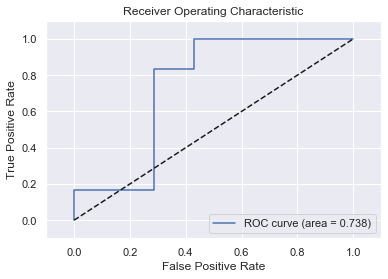

In [45]:
# fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y, model3.predict_proba(x_3)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
x_test = np.array([0.5, 3.5, 5.5, 10, 19]).reshape(-1,1)
y_test = np.array([1, 0, 1, 0, 0])

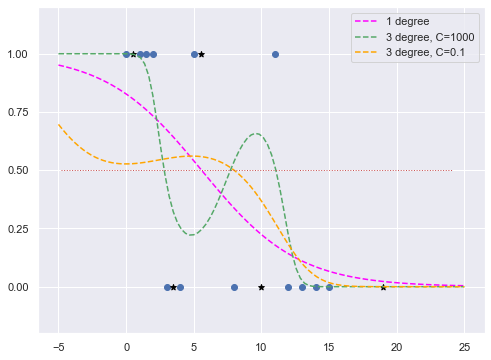

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
plt.plot(x_, y_lr1, linestyle='dashed', color='magenta')
plt.plot(x_, y_lr2, linestyle='dashed', color='g')
plt.plot(x_, y_lr3, linestyle='dashed', color='orange')
plt.axhline(y=0.5, xmin=0.05, xmax=0.93, linewidth=1, linestyle='dotted', color='r')
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.legend(['1 degree','3 degree, C=1000', '3 degree, C=0.1'])
plt.show()
plt.show()

In [48]:
x_test_3 = transformer.fit_transform(x_test) # make third degree for test (because of our model)

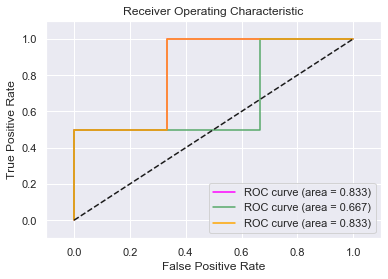

In [49]:
# fpr, tpr, thresholds and roc auc
fpr1, tpr1, thresholds1 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict_proba(x_test_3)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(x_test_3)[:,1])
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
# Plot ROC curve
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.3f)' % roc_auc1, color='magenta')
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.3f)' % roc_auc2, color='g')
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.3f)' % roc_auc3, color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Exercise
Compare other metrics for train and tets dataset, make conclusions

### K-nearest Neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [51]:
test_pr_knn = neigh.predict(x_test)
train_knn = neigh.predict(x)

In [52]:
print(classification_report(y_test,test_pr_knn))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [53]:
print(classification_report(y,train_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.67      0.80         6

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



In [54]:
roc_auc_score(y_test,test_pr_knn)

0.75

In [55]:
roc_auc_score(y,train_knn)

0.8333333333333333

In [56]:
x_linsp = np.linspace(0,25,100).reshape(-1,1)
model1 = KNeighborsClassifier(n_neighbors=1).fit(x,y)
y_knn_1 = model1.predict_proba(x_linsp)[:,1]
model2 = KNeighborsClassifier(n_neighbors=2).fit(x,y)
y_knn_2 = model2.predict_proba(x_linsp)[:,1]
model3 = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(x,y)
y_knn_3 = model3.predict_proba(x_linsp)[:,1]

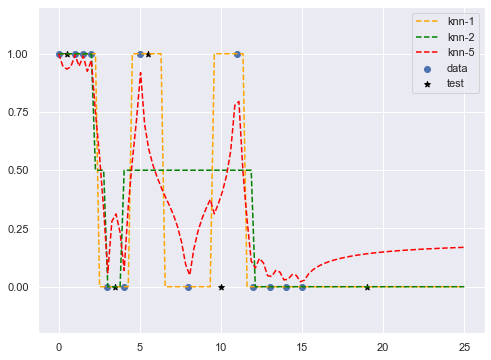

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
plt.plot(x_linsp, y_knn_1, linestyle='dashed', color='orange')
plt.plot(x_linsp, y_knn_2, linestyle='dashed', color='green')
plt.plot(x_linsp, y_knn_3, linestyle='dashed', color='red')

plt.legend(['knn-1', 'knn-2','knn-5', 'data', 'test'])
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.show()

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x, y)
test_pred = dt.predict(x_test)
train_pred = dt.predict(x)

In [60]:
x_linsp = np.linspace(0,25,100).reshape(-1,1)
model1 = DecisionTreeClassifier(max_depth=2).fit(x,y)
y_dt_1 = model1.predict_proba(x_linsp)[:,1]
model2 = DecisionTreeClassifier(max_depth=3).fit(x,y)
y_dt_2 = model2.predict_proba(x_linsp)[:,1]
model3 = DecisionTreeClassifier(max_depth=5).fit(x,y)
y_dt_3 = model3.predict_proba(x_linsp)[:,1]

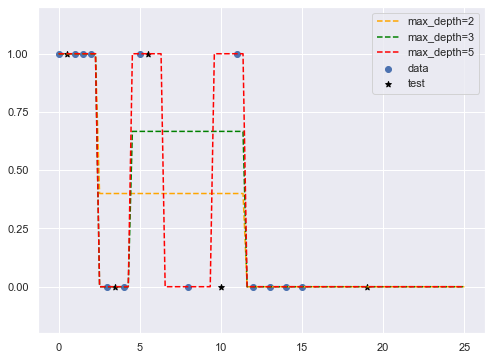

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
plt.plot(x_linsp, y_dt_1, linestyle='dashed', color='orange')
plt.plot(x_linsp, y_dt_2, linestyle='dashed', color='green')
plt.plot(x_linsp, y_dt_3, linestyle='dashed', color='red')
plt.legend(['max_depth=2', 'max_depth=3', 'max_depth=5', 'data', 'test'])
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.show()

### Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators=6, random_state=40)
rf.fit(x, y)
test_pred = rf.predict(x_test)
train_pred = rf.predict(x)

In [64]:
rf1 = RandomForestClassifier(n_estimators=3, max_depth=3).fit(x,y)
y_rf_1 = rf1.predict_proba(x_linsp)[:,1]
rf2 = RandomForestClassifier(n_estimators=5, max_depth=3).fit(x,y)
y_rf_2 = rf2.predict_proba(x_linsp)[:,1]
rf3 = RandomForestClassifier(n_estimators=6, max_depth=3).fit(x,y)
y_rf_3 = rf3.predict_proba(x_linsp)[:,1]

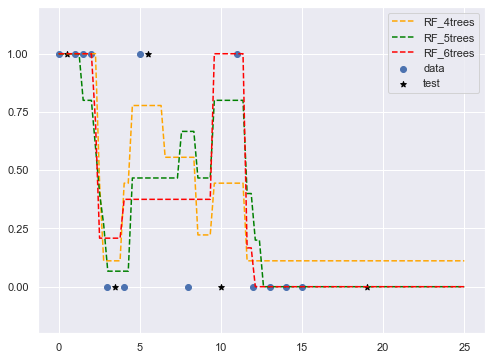

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
plt.plot(x_linsp, y_rf_1, linestyle='dashed', color='orange')
plt.plot(x_linsp, y_rf_2, linestyle='dashed', color='green')
plt.plot(x_linsp, y_rf_3, linestyle='dashed', color='red')
plt.legend(['RF_4trees', 'RF_5trees', 'RF_6trees', 'data', 'test'])
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.show()

### Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.02, max_depth=2)
gbc.fit(x, y)
test_pred = gbc.predict(x_test)
train_pred = gbc.predict(x)

In [68]:
gbc1 =  GradientBoostingClassifier(n_estimators=5, max_depth=2).fit(x,y)
y_gbc_1 = gbc1.predict_proba(x_linsp)[:,1]
gbc2 =  GradientBoostingClassifier(n_estimators=10, max_depth=2).fit(x,y)
y_gbc_2 = gbc2.predict_proba(x_linsp)[:,1]
gbc3 =  GradientBoostingClassifier(n_estimators=20, max_depth=2).fit(x,y)
y_gbc_3 = gbc3.predict_proba(x_linsp)[:,1]
gbc4 =  GradientBoostingClassifier(n_estimators=50, max_depth=2).fit(x,y)
y_gbc_4 = gbc4.predict_proba(x_linsp)[:,1]

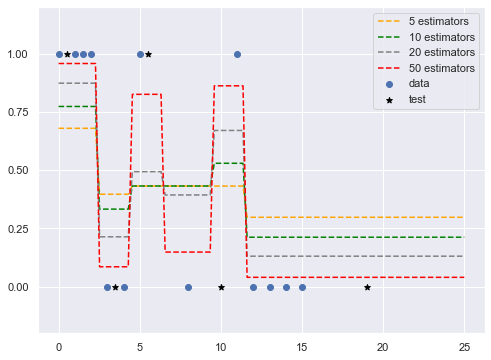

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
plt.plot(x_linsp, y_gbc_1, linestyle='dashed', color='orange')
plt.plot(x_linsp, y_gbc_2, linestyle='dashed', color='green')
plt.plot(x_linsp, y_gbc_3, linestyle='dashed', color='grey')
plt.plot(x_linsp, y_gbc_4, linestyle='dashed', color='red')
plt.legend(['5 estimators', '10 estimators', '20 estimators', '50 estimators', 'data', 'test'])
plt.yticks([0, 0.25,0.5,0.75,1])
plt.ylim([-0.2,1.2])
plt.show()